In [136]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [137]:
# Load the diabetes dataset
A, b = datasets.load_diabetes(return_X_y=True)

In [138]:
def generateTrainTest(A,b):
    # Load the diabetes dataset
    indices = np.random.permutation(A.shape[0])
    # Apply the permutation to shuffle both A and b
    A = A[indices]
    b = b[indices]
    # split the data to train and test
    split_index = int(0.8*len(b))
    b_train, b_test = b[:split_index], b[split_index:]
    A_train, A_test = A[:split_index,] , A[split_index:]
    return A_train, b_train, A_test, b_test

In [139]:
# our parameters for gradient descent
n = 10  # length of initial vector
k = 10000 # number of iterations
eps = 1e-2 # step size
# l = 4 # error allowed

In [140]:
err_fun = lambda x,A,b: .5 * np.linalg.norm(A @ x - b) ** 2  # returns value of f(x)

In [141]:
# gradient descent train
def gradientDescent():
    A_train, b_train, A_test, b_test = generateTrainTest(A,b)
    xk = np.random.rand(n)
    errors_test = []
    errors_train = []
    for jj in range(k):
        grad = (A_train.T @ A_train) @ xk - A_train.T @ b_train
        xk = xk - eps * grad

        err_train = err_fun(xk, A_train, b_train)
        err_test = err_fun(xk, A_test, b_test)
        
        if (jj %(k/10) == 0):
            print('GD, iter {}, error = {:.3e}'.format(jj, err_train))
        errors_train.append(err_train)
        errors_test.append(4*err_test) # account for number of data points (MSE)
        
    return errors_train, errors_test

In [142]:
all_train_errors = []
all_test_errors = []
for i in range(10):
    errors_train, errors_test = gradientDescent()
    all_train_errors.append(errors_train)
    all_test_errors.append(errors_test)
    
# getting average
average_train_errors = np.mean(all_train_errors, axis=0)
average_test_errors = np.mean(all_test_errors, axis=0)
# getting min
min_train_errors = np.min(all_train_errors, axis=0)
min_test_errors = np.min(all_test_errors, axis=0)


GD, iter 0, error = 5.111e+06
GD, iter 1000, error = 4.599e+06
GD, iter 2000, error = 4.599e+06
GD, iter 3000, error = 4.599e+06
GD, iter 4000, error = 4.598e+06
GD, iter 5000, error = 4.598e+06
GD, iter 6000, error = 4.598e+06
GD, iter 7000, error = 4.598e+06
GD, iter 8000, error = 4.598e+06
GD, iter 9000, error = 4.598e+06
GD, iter 0, error = 5.107e+06
GD, iter 1000, error = 4.537e+06
GD, iter 2000, error = 4.537e+06
GD, iter 3000, error = 4.537e+06
GD, iter 4000, error = 4.536e+06
GD, iter 5000, error = 4.536e+06
GD, iter 6000, error = 4.536e+06
GD, iter 7000, error = 4.536e+06
GD, iter 8000, error = 4.536e+06
GD, iter 9000, error = 4.535e+06
GD, iter 0, error = 5.052e+06
GD, iter 1000, error = 4.583e+06
GD, iter 2000, error = 4.580e+06
GD, iter 3000, error = 4.578e+06
GD, iter 4000, error = 4.576e+06
GD, iter 5000, error = 4.574e+06
GD, iter 6000, error = 4.572e+06
GD, iter 7000, error = 4.570e+06
GD, iter 8000, error = 4.569e+06
GD, iter 9000, error = 4.568e+06
GD, iter 0, error =

7.212159273290997%
2.2806688021029338%


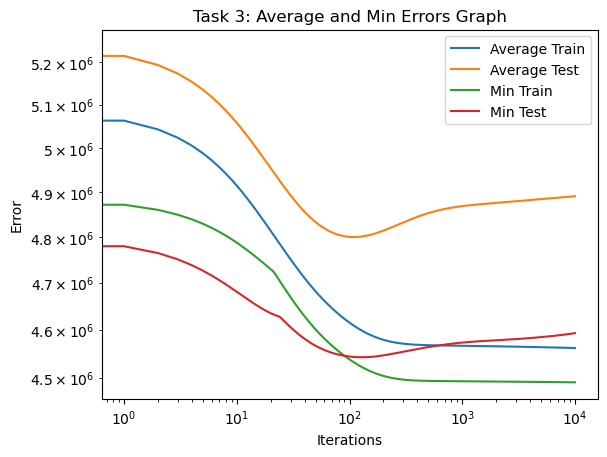

In [143]:
average_train_errors_x = np.stack(average_train_errors)
average_test_errors_x = np.stack(average_test_errors)
min_train_errors = np.stack(min_train_errors)
min_test_errors_x = np.stack(min_test_errors)

relative_error = np.abs(min_train_errors[-1]-min_test_errors_x[-1])/min_train_errors[-1]
relative_error_average = np.abs(average_train_errors_x[-1]-average_test_errors_x[-1])/average_train_errors_x[-1]
print(str(100*relative_error_average)+"%")
print(str(100*relative_error)+"%")
plt.plot(average_train_errors_x, label='Average Train')
plt.plot(average_test_errors_x, label='Average Test')
plt.plot(min_train_errors, label='Min Train')
plt.plot(min_test_errors_x, label='Min Test')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.title("Task 3: Average and Min Errors Graph")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

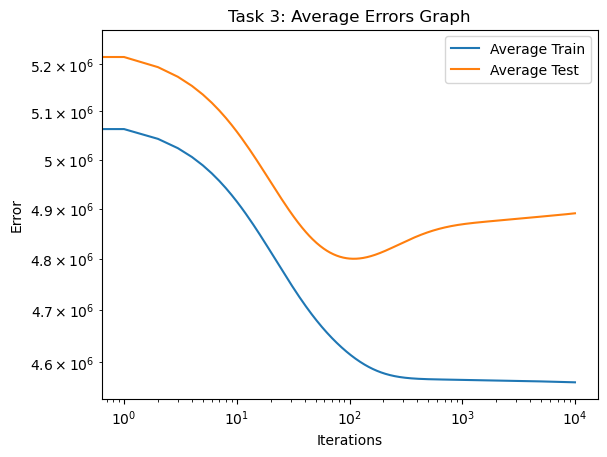

In [144]:
average_train_errors_x = np.stack(average_train_errors)
average_test_errors_x = np.stack(average_test_errors)

plt.plot(average_train_errors_x, label='Average Train')
plt.plot(average_test_errors_x, label='Average Test')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.title("Task 3: Average Errors Graph")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

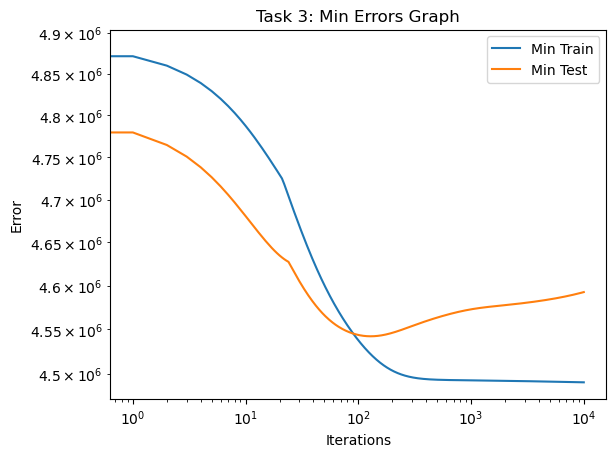

In [145]:
min_train_errors = np.stack(min_train_errors)
min_test_errors_x = np.stack(min_test_errors)

plt.plot(min_train_errors, label='Min Train')
plt.plot(min_test_errors_x, label='Min Test')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.title("Task 3: Min Errors Graph")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()